<a href="https://colab.research.google.com/github/tousifp777/EDA_Casestudies/blob/main/Case_No_2_Bank_Marketing_%26_TeleCommunication_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import Dataset Using Pandas Functions
df = pd.read_csv('bank (1).csv',sep = ';')
df.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3580,38,entrepreneur,married,tertiary,no,6704,yes,no,unknown,21,may,205,2,-1,0,unknown,no
4301,49,blue-collar,married,primary,no,371,yes,no,cellular,31,jul,18,44,-1,0,unknown,no
2647,52,management,married,tertiary,no,575,no,no,unknown,3,jun,315,1,-1,0,unknown,no
3661,36,technician,single,secondary,no,0,no,no,cellular,29,aug,85,6,-1,0,unknown,no
2519,43,technician,single,tertiary,yes,0,no,no,cellular,29,aug,73,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,34,management,married,tertiary,no,415,no,yes,cellular,23,jul,361,2,-1,0,unknown,no
1307,41,blue-collar,married,secondary,no,1459,no,no,unknown,5,jun,82,1,-1,0,unknown,no
3970,48,management,married,tertiary,no,586,yes,yes,cellular,6,may,179,2,-1,0,unknown,no
1087,47,self-employed,married,tertiary,no,751,no,no,cellular,24,jul,408,14,-1,0,unknown,no


In [10]:
# Problem Definition:
'''
This Dataset belong to Portugal Bank Telemarketing. Where our aim isn to predict
whether the client will subscribe a term deposit or not.Hence 'y' will be act as
target column or dependent column whereas other columns are independent columns.

x = independent columns
y = dependent column/ target column
'''

# checking dataset information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


'\nThe following Graph Shows, we dont have any missing values present in any of the\ncolumn\n'

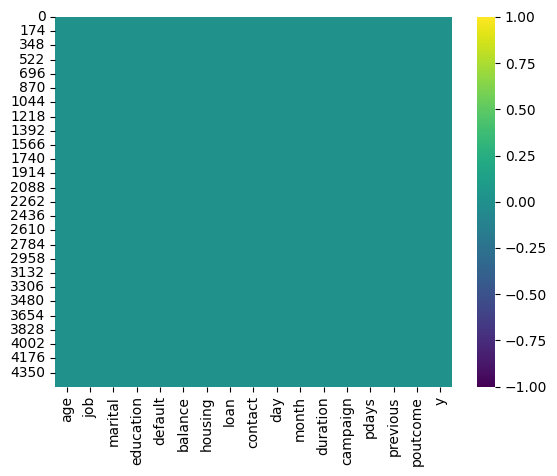

In [11]:
# Checking Null values Present in Dataset:
#df.isnull().sum()
sns.heatmap(df.isnull(),cmap = 'viridis',vmin = -1,vmax = 1,center =0)

'''
The following Graph Shows, we dont have any missing values present in any of the
column
'''

<Axes: >

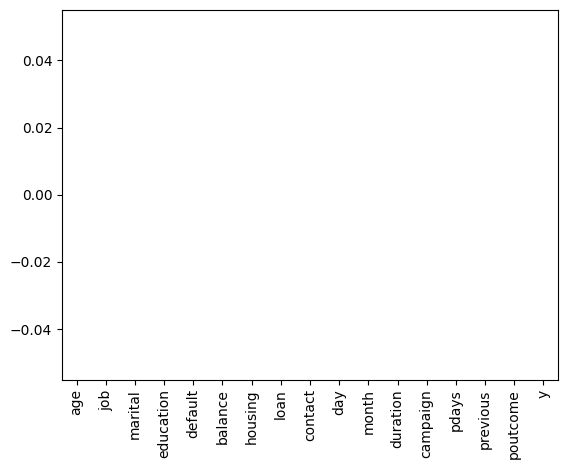

In [12]:
df.isnull().sum().plot(kind = 'bar',cmap = 'viridis')

In [13]:
# Split the Dataset into Categorical and Numerical

categorical_col = df.select_dtypes(include = 'object')
categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [14]:
numerical_col = df.select_dtypes(exclude = 'object')
numerical_col


,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [15]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


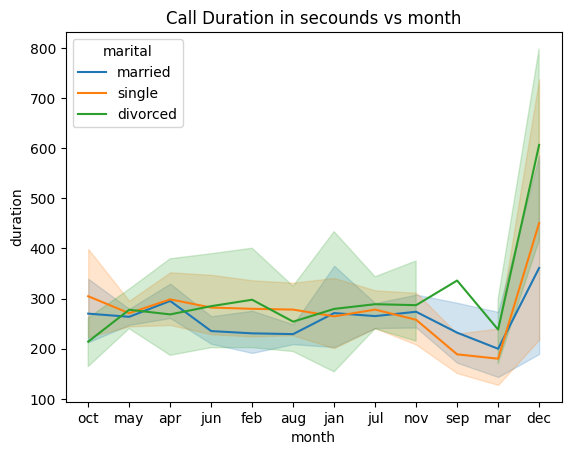

In [16]:
sns.lineplot(x = df['month'],y = df['duration'],c = 'red',hue = df['marital'])
plt.title('Call Duration in secounds vs month')
plt.show()

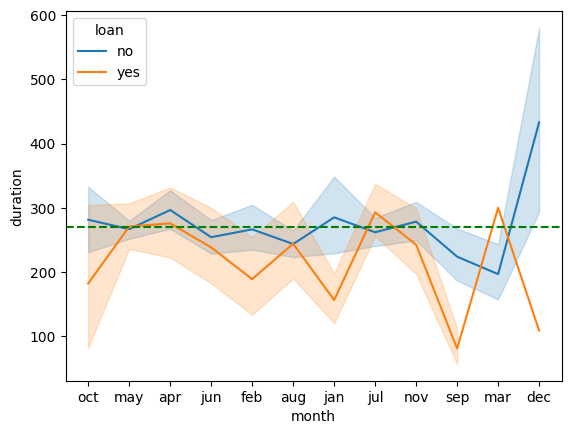

In [17]:
sns.lineplot(x = df['month'],y = df['duration'],hue = df['loan'])
plt.axhline(270,linestyle = '--',color ='green')

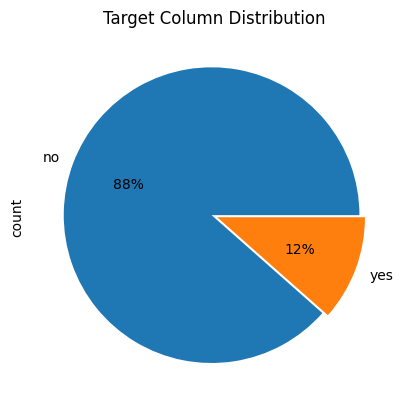

In [18]:
df['y'].value_counts().plot(kind = 'pie',autopct = '%1.0f%%',explode =[0.02,0.02])
plt.title('Target Column Distribution')
plt.show()

<Axes: ylabel='count'>

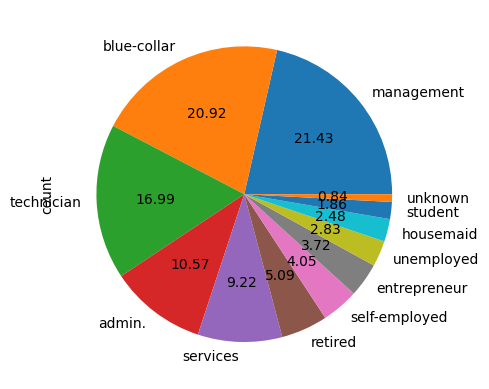

In [19]:
df['job'].value_counts().plot(kind = 'pie',autopct = '%1.2f')

In [20]:
management_job = df[(df['job'] == 'management') & (df['y'] == 'yes')]


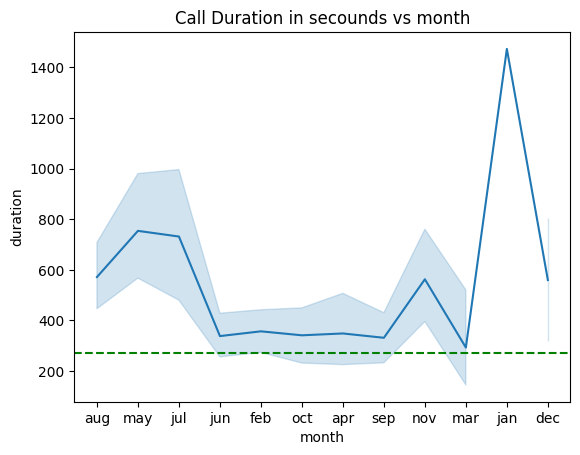

In [21]:
sns.lineplot(x = management_job['month'],y = management_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()



In [22]:
admin_job = df[(df['job'] == 'admin.') & (df['y'] == 'yes')]

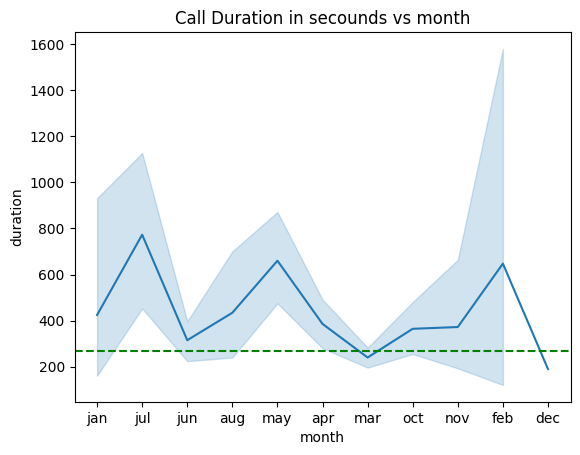

In [23]:
sns.lineplot(x = admin_job['month'],y = admin_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()


In [24]:
bluecollar_job = df[(df['job'] == 'blue-collar') & (df['y'] == 'yes')]

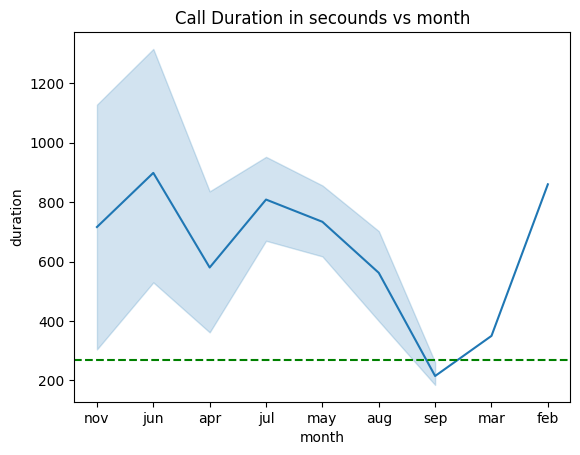

In [25]:
sns.lineplot(x = bluecollar_job['month'],y = bluecollar_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()


In [26]:
services_job = df[(df['job'] == 'services') & (df['y'] == 'yes')]

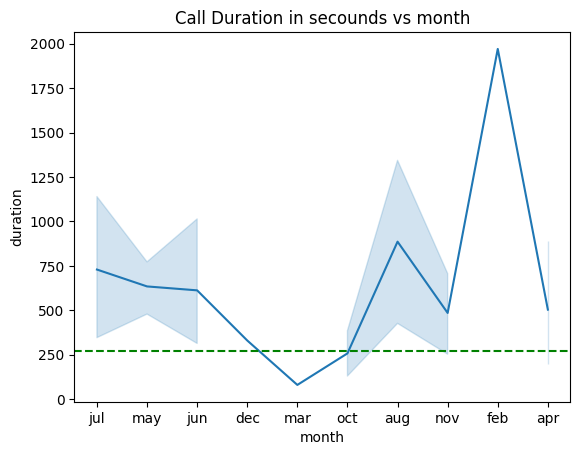

In [27]:
sns.lineplot(x = services_job['month'],y = services_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()


In [28]:
technician_job = df[(df['job'] == 'technician') & (df['y'] == 'yes')]

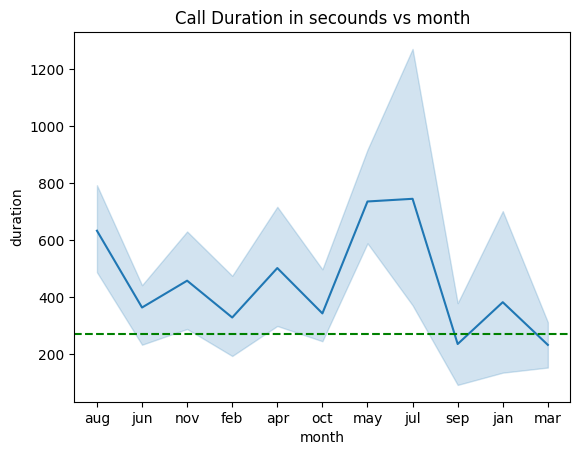

In [29]:
sns.lineplot(x = technician_job['month'],y = technician_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()


In [30]:
df[df['job'] == 'admin.'].agg(['mode'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode
0,34.0,admin.,married,secondary,no,0.0,yes,no,cellular,20.0,may,77,1.0,-1.0,0.0,unknown,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN


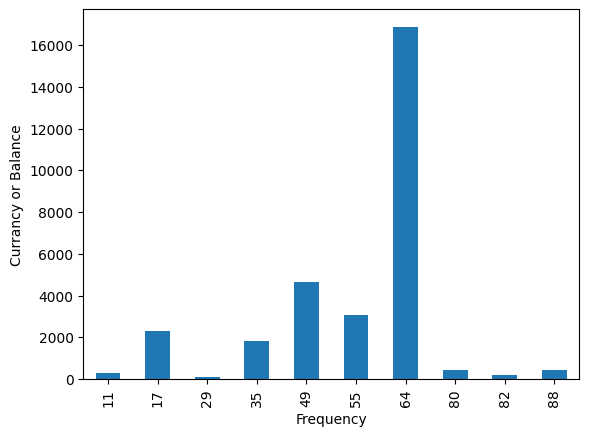

In [31]:
df[df['job'] == 'admin.']['balance'][:10].plot(kind = 'bar')
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

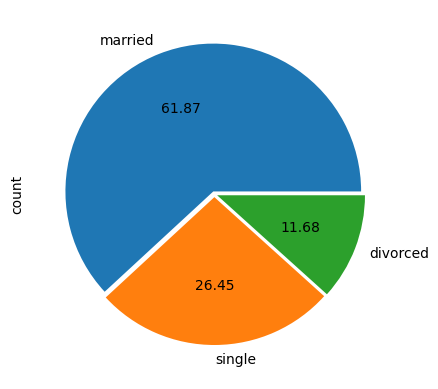

In [32]:
df['marital'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode =[0.02,0.02,0.02])
plt.show()

In [33]:
divorced = df[(df['marital'] == 'divorced') & (df['y'] == 'yes')]

<Axes: ylabel='count'>

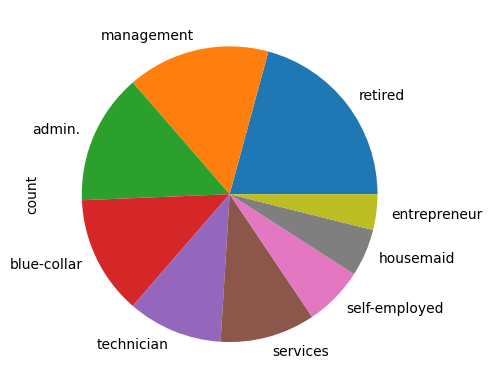

In [34]:
divorced['job'].value_counts().plot(kind = 'pie')

In [35]:
divorced_retired = divorced[divorced['job'] == 'retired']

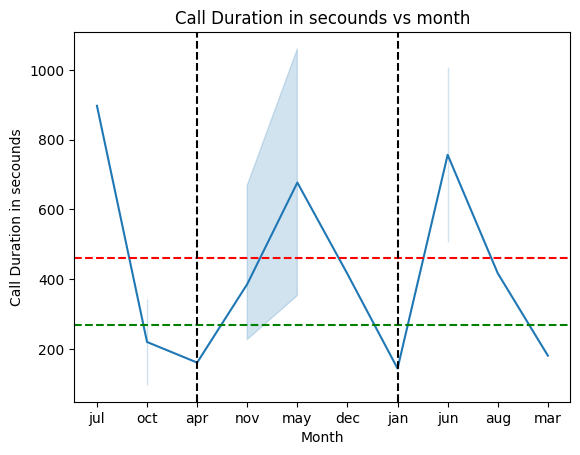

In [36]:
sns.lineplot(x = divorced_retired['month'],y = divorced_retired['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle = '--',color ='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in secounds')
plt.axvline('apr',linestyle = '--',color ='black')
plt.axvline('jan',linestyle = '--',color ='black')
plt.title('Call Duration in secounds vs month')
plt.show()

In [37]:
 # Univeraiate Analysis
 '''
Step 1 : Create a Blank List
Step 2: Create a dictionary
Step 3: Append list containing Disctionery key and value
Step 4: Convert list into Dataframe
 '''
 '''
 Note :
 If ANY cOLOMUN In Dataset shows IQR  as Zero such column must be dropped from the Dataset .
 IQR = Inter Quartile Range : Q3-Q1

'''

 from collections import OrderedDict
 stats = []

 for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Count': df[i].count(),
        'Minumum': df[i].min(),
        'Maximum': df[i].max(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Q1': df[i].quantile(0.25),
        'Q3': df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation': df[i].std(),
        'Kurtosis': df[i].kurt(),
        'Skewness': df[i].skew()

    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report


,Feature,Count,Minumum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness
0,age,4521,19,87,41.170095,39.0,33.0,49.0,16.0,10.576211,0.348775,0.699501
1,balance,4521,-3313,71188,1422.657819,444.0,69.0,1480.0,1411.0,3009.638142,88.390332,6.596431
2,day,4521,1,31,15.915284,16.0,9.0,21.0,12.0,8.247667,-1.039531,0.094627
3,duration,4521,4,3025,263.961292,185.0,104.0,329.0,225.0,259.856633,12.530050,2.772420
4,campaign,4521,1,50,2.793630,2.0,1.0,3.0,2.0,3.109807,37.168920,4.743914
5,pdays,4521,-1,871,39.766645,-1.0,-1.0,-1.0,0.0,100.121124,7.957128,2.717071
6,previous,4521,0,25,0.542579,0.0,0.0,0.0,0.0,1.693562,51.995212,5.875259


In [38]:
# Enchoding Techiqune
'''
Step 1: Converting Categorical Columns to Numercial Colunms
Step 2 : Use Label Encoder or  One Hot  Encoder
'''
# Create Copy datafrme :df
data = df.copy()
data = pd.get_dummies(data,drop_first=True,dtype='int')
data


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
'''
Note :
1. All Independent columns are decoded or encoded using the concept of label encoded or one hot encoder but target column must be encoded seperatealy using replace function or map function
2. In above dataset we find that 'y' is cats s target column where as other than 'y' column are termed as Independent Column
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encoding all categorical colmun using label encoder : Independent Column
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
# Encoding Target Column Seperately
df['y'] = df ['y'].replace({'yes':1,'no':0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [40]:
df.drop(columns=['pdays','previous'],axis=1,inplace=True)

In [41]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,1,0


In [42]:
df['y'].value_counts()

,count
y,
0,4000
1,521


In [43]:
# 1 . Understand Scaling Techquine
# 2. Data Leackage and How to Prevent the same
# 3 . How to balance target column : Three Strategies
'''
for a Calssification / Recommendation Problem :
# Step 1 : Split the dataset into X & y
            X : INdependent Column
            Y: Dependend Column/ Target Column
#Step 2:  Use Train Test Split:
          Alaways Split the dataset into Seen and Unseen data
          Seen data : Train data : 70% to 80 %
          Unseen data : Test Data 30% to 20%
          Test size must be between 0.20 to 0.30

# Step 3:  Try Balance Target Column using imblearn techquine
            Ibmlearn techquine (scikit learn library):
            1. Oversampling Techquine
            2. Undersampling Techquine

# Step 4 : Using Scaling Techquine
            Mean != Median : Data is Non Normal Distrubution
            Mean = Median : Data is Normal Distrubution

            Scaling Techquine :
          1. Standard Scaler :When the Dataset is Normal Distrbution
          2. Min Max Scaler : When the Dataset is Non Normal Distrbution
          3. Robust Scaler :When the Dataset has  Outlier  and because of which the Machine Learning Model becomes Sensative
#

'''



'\nfor a Calssification / Recommendation Problem :\n# Step 1 : Split the dataset into X & y\n            X : INdependent Column\n            Y: Dependend Column/ Target Column\n#Step 2:  Use Train Test Split:\n          Alaways Split the dataset into Seen and Unseen data\n          Seen data : Train data : 70% to 80 %\n          Unseen data : Test Data 30% to 20%\n          Test size must be between 0.20 to 0.30\n\n# Step 3:  Try Balance Target Column using imblearn techquine\n            Ibmlearn techquine (scikit learn library):\n            1. Oversampling Techquine\n            2. Undersampling Techquine\n\n# Step 4 : Using Scaling Techquine\n            Mean != Median : Data is Non Normal Distrubution\n            Mean = Median : Data is Normal Distrubution\n\n            Scaling Techquine :\n          1. Standard Scaler :When the Dataset is Normal Distrbution\n          2. Min Max Scaler : When the Dataset is Non Normal Distrbution\n          3. Robust Scaler :When the Dataset ha

In [44]:
# Step 1: Split The Dataset into X & y
from sklearn.model_selection import train_test_split
# Independent Column
X = df.drop(columns='y',axis=1)
# Dependent Column
y = df['y']
# Step 2 : Use Train and Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Step 3: Balance Techqine : Understanding Technique
from imblearn.under_sampling import ClusterCentroids,AllKNN,OneSidedSelection,NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN,BorderlineSMOTE

sampling = SMOTE()
X_train,y_train = sampling.fit_resample(X_train,y_train)
y_train.value_counts() # This Shows the Dataset

# Step 4: Using Scaling Techquine
'''
Note :
1. Alaways fit_transform on training Data Where as use transform on Test Data
# Seen  Data
X_train = Scaler .fit_transform(X_train)
# Unseen Data
X_test = Scaler.transform(X_test)
'''
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler = MinMaxScaler()
# Seen Data
X_train = scaler.fit_transform(X_train)
# Unseen Data
X_test = scaler.transform(X_test)
# Checking
(X_test.max(),X_test.min())

(np.float64(2.5058924583404916), np.float64(-0.05383954646967875))

In [45]:
# Checking
(X_test.max(),X_test.min())

(np.float64(2.5058924583404916), np.float64(-0.05383954646967875))